In [1]:
#in His Name

نصب و فراخوانی ماژول‌های 
- `numpy` برای انجام عملیات آرایه‌ای
- `matplotlib` برای تصویر سازی داده
- `sklearn` برای دسترسی به مجموعه داده دیابت

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

پیاده‌سازی توابع رگرسیون خطی

In [19]:
class Linear_Regression:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.alpha0 = 0
        self.alpha1 = 0
        self.coefficients = [self.alpha0, self.alpha1]
    
    def fit(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        
        self.alpha1 =np.sum((self.x-np.average(self.x))*(self.y-np.average(self.y)))/np.sum((self.x-np.average(self.x))**2)
        self.alpha0 = np.average(self.y)-(self.alpha1)*np.average(self.x)
        
        self.coefficients = [self.alpha0, self.alpha1]
        return self
    
    def predict(self, x):
        #TODO
        return self.alpha0 + self.alpha1*x
    
    def mean_squared_error(self, y_test, y_pred):
        #TODO
        return (1/len(y_test))*np.sum((y_test-y_pred)**2)

دسترسی به مجموعه داده دیابت

In [20]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

تقسیم داده به دو قسمت آموزش و آزمون

In [21]:
# Use only one feature(BMI)
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
n = 100
diabetes_X_train = diabetes_X[:-n].reshape(-1)
diabetes_X_test = diabetes_X[-n:].reshape(-1)

# Split the targets into training/testing sets
diabetes_Y_train = diabetes.target[:-n]
diabetes_Y_test = diabetes.target[-n:]

تعریف مدل و اعمال مدل رگرسیون خطی روی داده

In [22]:
# Create linear regression object
regr = Linear_Regression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_Y_train)

# Make predictions using the testing set
diabetes_Y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coefficients)

print("Mean squared error: {}".format(regr.mean_squared_error(diabetes_Y_test, diabetes_Y_pred)))

Coefficients: 
 [152.27671846254782, 953.3606272001139]
Mean squared error: 3752.769434735645


رسم خط برازش‌یافته

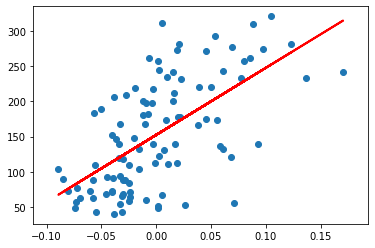

In [23]:
plt.scatter(diabetes_X_test, diabetes_Y_test)
plt.plot(diabetes_X_test, diabetes_Y_pred, c='r', linewidth=2)